In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib  # To save the model

# Function to load images and convert them to feature vectors
def load_images(folder_path, label, image_size=(64, 64)):
    images = []
    labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpg"):
            image_path = os.path.join(folder_path, file_name)
            image = Image.open(image_path).convert('L')  # Convert to grayscale
            image = image.resize(image_size)
            image_array = np.array(image).flatten()  # Flatten to 1D array
            images.append(image_array)
            labels.append(label)
    return images, labels

# Load healthy and unhealthy images
healthy_images, healthy_labels = load_images('D:/AI Algorithm/Castor/healthy spikes/', 0)
unhealthy_images, unhealthy_labels = load_images('D:/AI Algorithm/Castor/infected spikes/', 1)

# Combine images and labels
X = np.array(healthy_images + unhealthy_images)
y = np.array(healthy_labels + unhealthy_labels)

print(f"Total samples: {len(y)}, Healthy: {sum(y==0)}, Unhealthy: {sum(y==1)}")


C:\Users\Anurag\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Anurag\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


Total samples: 2963, Healthy: 828, Unhealthy: 2135


In [2]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")


Model accuracy: 86.17%


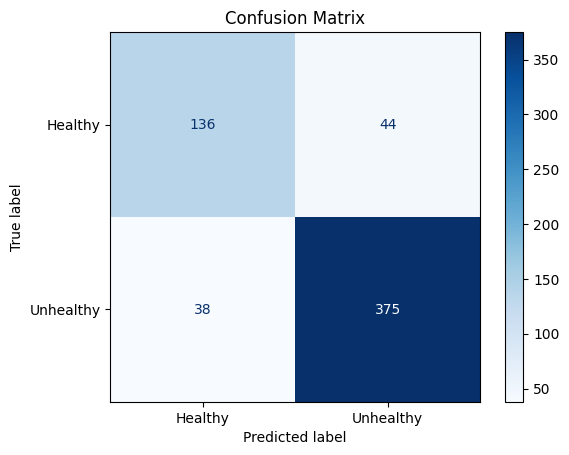

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Unhealthy'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [4]:
# Save the trained model using joblib
joblib.dump(clf, 'cucumber_leaf_classifier.pkl')
print("Model saved as cucumber_leaf_classifier.pkl")

Model saved as cucumber_leaf_classifier.pkl


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score, r2_score

# Assuming 'clf' is your trained model and 'X_test' and 'y_test' are your test features and labels.
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probabilities for AUC and Log Loss

# Evaluation for Classification Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Evaluation for Regression Metrics (assuming you might be dealing with probabilistic outputs)
# You may skip these if your model isn't predicting continuous values, but you can use them if needed for model comparison.
if len(y_prob) == len(y_test):  # Ensure we're comparing continuous values for MAE, MSE, etc.
    mae = mean_absolute_error(y_test, y_prob)
    mse = mean_squared_error(y_test, y_prob)
    rmse = np.sqrt(mse)
    #rmse = mean_squared_error(y_test, y_prob, squared=False)
    mape = mean_absolute_percentage_error(y_test, y_prob)

    # Computing Systematic Mean Absolute Percentage Error (SMAPE)
    epsilon = 1e-10  # Small constant to prevent division by zero
    smape = 100 * np.mean(2 * np.abs(y_prob - y_test) / (np.abs(y_prob) + np.abs(y_test) + epsilon))
    #smape = 100 * np.mean(2 * np.abs(y_prob - y_test) / (np.abs(y_prob) + np.abs(y_test)))

    evs = explained_variance_score(y_test, y_prob)
    r2 = r2_score(y_test, y_prob)

    # Mean Bias Deviation (MBD) = mean of (predicted - actual) values
    mbd = np.mean(y_pred - y_test)

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
    print(f"Systematic Mean Absolute Percentage Error (SMAPE): {smape:.2f}")
    print(f"Explained Variance Score: {evs:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print(f"Mean Bias Deviation (MBD): {mbd:.2f}")
else:
    print("Regression metrics are not applicable as the model is for classification.")


Accuracy: 0.86
Precision: 0.89
Recall: 0.91
F1-Score: 0.90
AUC: 0.83
Confusion Matrix:
[[136  44]
 [ 38 375]]
Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.14
Root Mean Squared Error (RMSE): 0.37
Mean Absolute Percentage Error (MAPE): 334162535589041.94
Systematic Mean Absolute Percentage Error (SMAPE): 27.66
Explained Variance Score: 0.35
R^2 Score: 0.35
Mean Bias Deviation (MBD): 0.01


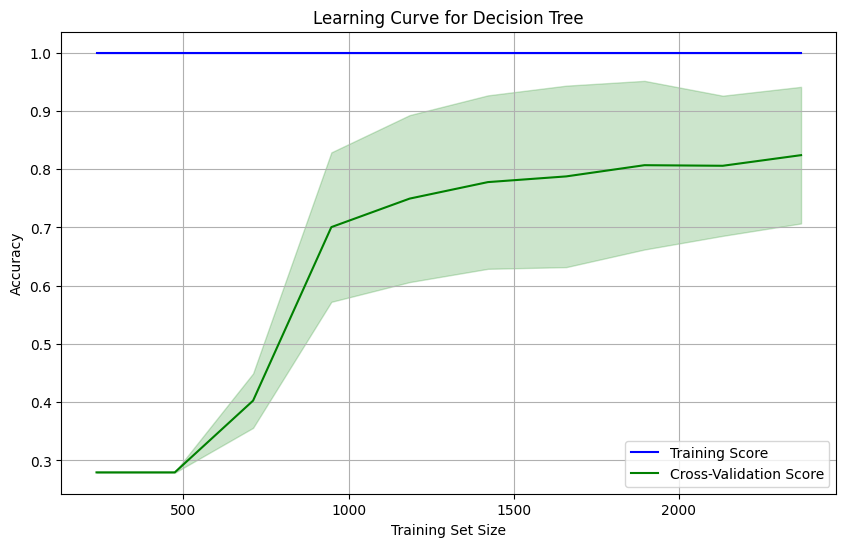

In [6]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring.capitalize())
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot the learning curve for the Decision Tree model
plot_learning_curve(clf, X, y, title="Learning Curve for Decision Tree")